### Investigating texts from Project Gutenberg

![](images/gutenberg.png)

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests

In [2]:
from bs4 import BeautifulSoup

In [3]:
url = "http://www.gutenberg.org/files/15784/15784-0.txt"

In [4]:
response = requests.get(url)

In [5]:
type(response)

requests.models.Response

In [6]:
soup_dos = BeautifulSoup(response.content, "html.parser")

In [7]:
len(soup_dos)

1

In [8]:
dos_text = soup_dos.get_text()

In [9]:
type(dos_text)

str

In [10]:
len(dos_text)

550924

In [11]:
dos_text[:100]

'The Project Gutenberg EBook of The Chronology of Ancient Kingdoms Amended\r\nby Isaac Newton\r\n\r\nThis e'

### Analyzing the Text with NLTK

The Natural Language Toolkit is a popular Python library for text analysis.  We will use it to split the text into individual words(tokens), and create a plot of the frequency distribution of the tokens.  

In [15]:
import nltk
from nltk import word_tokenize
tokens = word_tokenize(dos_text)

In [16]:
tokens[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'Chronology',
 'of',
 'Ancient',
 'Kingdoms']

In [17]:
text = nltk.Text(tokens)

In [18]:
text[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'Chronology',
 'of',
 'Ancient',
 'Kingdoms']

In [19]:
fdist = nltk.FreqDist(text)

In [20]:
type(fdist)

nltk.probability.FreqDist

In [21]:
fdist.most_common(50)

[(',', 8704),
 ('the', 7568),
 ('and', 5062),
 ('of', 5017),
 ('.', 3525),
 ('in', 1805),
 ('to', 1508),
 (';', 1200),
 (':', 1158),
 ('[', 1023),
 (']', 1023),
 ('that', 1004),
 ('by', 970),
 ('was', 941),
 ('a', 804),
 ('his', 703),
 ('with', 612),
 ('or', 588),
 ('years', 567),
 ('from', 531),
 ('for', 482),
 ('were', 455),
 ('their', 405),
 ('is', 394),
 ('he', 392),
 ('this', 389),
 ('year', 384),
 ('_Egypt_', 380),
 ('King', 378),
 ('which', 373),
 ('as', 373),
 ('at', 357),
 ('after', 348),
 ('they', 345),
 ('into', 342),
 ('it', 341),
 ('who', 322),
 ('l.', 313),
 ('son', 310),
 ('be', 303),
 ('Reign', 290),
 ('before', 284),
 ('Kings', 265),
 ('first', 261),
 ('about', 258),
 ('had', 250),
 ('not', 250),
 ('but', 242),
 ('The', 236),
 ('one', 235)]

In [22]:
fdist['blood']

5

In [23]:
fdist = nltk.FreqDist(word.lower() for word in word_tokenize(dos_text))

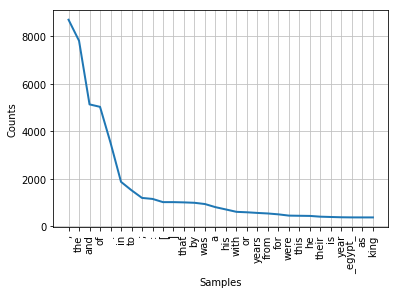

In [26]:
plt.figure()
fdist.plot(30)

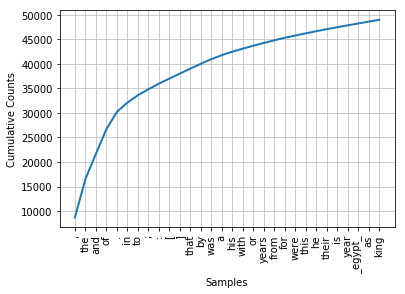

In [27]:
plt.figure()
fdist.plot(30, cumulative=True)

In [28]:
tagged = nltk.pos_tag(text)

In [29]:
tagged[:10]

[('The', 'DT'),
 ('Project', 'NNP'),
 ('Gutenberg', 'NNP'),
 ('EBook', 'NNP'),
 ('of', 'IN'),
 ('The', 'DT'),
 ('Chronology', 'NNP'),
 ('of', 'IN'),
 ('Ancient', 'NNP'),
 ('Kingdoms', 'NNP')]

In [32]:
text.similar("god")

and king into reign city or in the of to first people empire temple
history kings year reigns place expedition


In [37]:
text.common_contexts(["king", "lord"])

now_of only_of the_and


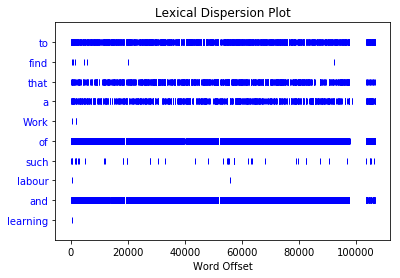

In [40]:
text.dispersion_plot(tokens[500:510])

In [43]:
len(text)

106732

In [44]:
sorted(set(text))

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'AS-IS",
 "'Till",
 "'d",
 "'s",
 "'till",
 '(',
 ')',
 '*',
 '***',
 '*****',
 ',',
 '-',
 '--',
 '.',
 '//gutenberg.net/license',
 '//pglaf.org',
 '//pglaf.org/donate',
 '//pglaf.org/fundraising',
 '//www.gutenberg.net',
 '//www.gutenberg.org/1/5/7/8/15784/',
 '//www.pglaf.org',
 '00',
 '1',
 '1.',
 '1.A',
 '1.B',
 '1.C',
 '1.D',
 '1.E',
 '1.E.1',
 '1.E.2',
 '1.E.3',
 '1.E.4',
 '1.E.5',
 '1.E.6',
 '1.E.7',
 '1.E.8',
 '1.E.9',
 '1.F',
 '1.F.1',
 '1.F.2',
 '1.F.3',
 '1.F.4',
 '1.F.5',
 '1.F.6',
 '10',
 '10.',
 '100',
 '10000',
 '1002',
 '1005',
 '1006',
 '1007',
 '1008',
 '101',
 '1010',
 '1014',
 '1015',
 '1017',
 '1019',
 '102',
 '1020',
 '1028',
 '103',
 '1030',
 '1034',
 '1035',
 '1039',
 '104',
 '1043',
 '1045',
 '1046',
 '1047',
 '1048',
 '105',
 '1052',
 '1053',
 '1059',
 '105th',
 '106',
 '1060',
 '1069',
 '107',
 '1070',
 '108',
 '1080',
 '1085',
 '109',
 '1090',
 '11',
 '11.',
 '110',
 '1100',
 '11000',
 '111',
 '112',
 '1125',
 '1

### Lexical Richness of Text

In [45]:
len(set(text))/len(text)

0.0981149046209197

In [48]:
text.count("Kings")

265

In [49]:
100*text.count("Kings")/len(text)

0.24828542517707905

### Stopwords

In [69]:
from nltk.corpus import stopwords

In [70]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 'should',
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'the',
 'their',
 'theirs',
 'them',
 

In [71]:
stop_words = set(stopwords.words('english'))

In [76]:
filter_text = [w for w in text if not w in stop_words ]

In [77]:
filter_text[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'The',
 'Chronology',
 'Ancient',
 'Kingdoms',
 'Amended',
 'Isaac']

### Lists Reminders

In [50]:
sent = ['Call', 'me', 'Ishmael', '.']

In [51]:
sent

['Call', 'me', 'Ishmael', '.']

In [52]:
sent[0]

'Call'

In [53]:
sent.append('stever')

In [54]:
sent

['Call', 'me', 'Ishmael', '.', 'stever']

In [55]:
sent.index('stever')

4

### `set` and tokenizing

In [56]:
saying = ['After', 'all', 'is', 'said', 'and', 'done', 'more', 'is', 'said',
         'than', 'done']

In [57]:
tokens = set(saying)

In [58]:
tokens

{'After', 'all', 'and', 'done', 'is', 'more', 'said', 'than'}

In [59]:
tokens = sorted(tokens)

In [61]:
tokens[-2:]

['said', 'than']

In [62]:
long_words = [w for w in text if len(w)>15]

In [63]:
long_words

['www.gutenberg.net',
 '_Tiglathpilaser_',
 '_Misphragmuthosis_',
 '_Misphragmuthosis_',
 '_Misphragmuthosis_',
 '_Misphragmuthosis_',
 '_Tiglathpilasser_',
 '_Tiglathpilasser_',
 '_Tiglathpilasser_',
 '_Asserhadon-Pul_',
 '_Nebuchadnezzar_',
 '_Nebuchadnezzar_',
 '_Nebuchadnezzar_',
 '_Nebuchadnezzar_',
 '_Nebuchadnezzar_',
 '_Nebuchadnezzar_',
 'Halicarnassensis_',
 'Halicarnassensis_',
 'illuminationibus',
 'illuminationibus',
 'illuminationibus',
 'Halicarnassensis_',
 '_Misphragmuthosis_',
 '_Misphragmuthosis_',
 '_Misphragmuthosis_',
 '_Misphragmuthosis_',
 'fire-worshippers',
 '_Mediterranean__',
 '_Misphragmuthosis_',
 '_Misphragmuthosis_',
 '_Misphragmuthosis_',
 '_Tiglath-pileser_',
 '_Mediterranean__',
 '_Misphragmuthosis_',
 '_Tiglath-pileser_',
 '_Nebuchadnezzar_',
 '_Nebuchadnezzar_',
 '_Misphragmuthosis_',
 '_Misphragmuthosis_',
 '_Tiglath-Pul-Assur_',
 '_Assur-Hadon-Pul_',
 '_Nebo-Adon-Assur_',
 '_Nebo-Pul-Assur_',
 '_Nebo-Chaddon-Assur_',
 '_Nebo-Assur-Adon_',
 '_Nerga

In [66]:
list(nltk.bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [67]:
text.collocations()

Project Gutenberg-tm; _Red Sea_; _Anno Nabonass._; hundred years;
Project Gutenberg; years a-piece; _Argonautic_ expedition; _Trojan_
war; _Darius Hystaspis_; _Argonautic_ Expedition; _Assyrian_ Empire;
Literary Archive; _Darius Nothus_; Gutenberg-tm electronic; lower
_Egypt_; Archive Foundation; electronic works; Gutenberg Literary;
_Peloponnesian_ war; _Jupiter Ammon_


In [68]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### Task

1. Scrape and tokenize a text from project Gutenberg.

2. Compare the most frequent occurring words with and without stopwords removed.

3. Compare the top bigrams and trigrams for a second book.

**Further Reading**:  http://www.nltk.org/book/